# Simple GAN
As described in [this](https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f) artical.

In [31]:
import numpy as np

import torch
import torch.nn as nn
import torch.tensor as T

import matplotlib.pyplot as plt

In [26]:
torch.cuda.is_available()

True

In [39]:
def get_real_sampler(mu, sigma):
    return lambda n: T(np.random.normal(mu, sigma, size=(1, n)))

(array([  16.,  123.,  690., 1962., 3060., 2679., 1157.,  274.,   35.,
           4.]),
 array([-3.85645374, -3.03793214, -2.21941054, -1.40088894, -0.58236734,
         0.23615425,  1.05467585,  1.87319745,  2.69171905,  3.51024065,
         4.32876225]),
 <a list of 10 Patch objects>)

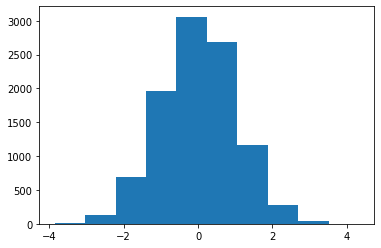

In [40]:
sample = get_real_sampler(0, 1)(10000)
plt.hist(sample)

In [72]:
def get_uniform_sample():
    return lambda a, b: torch.rand(a, b)

(array([ 92., 114.,  97.,  84., 101., 119.,  94., 107.,  85., 107.]),
 array([6.9528818e-04, 1.0047339e-01, 2.0025149e-01, 3.0002961e-01,
        3.9980769e-01, 4.9958581e-01, 5.9936392e-01, 6.9914204e-01,
        7.9892009e-01, 8.9869821e-01, 9.9847633e-01], dtype=float32),
 <a list of 10 Patch objects>)

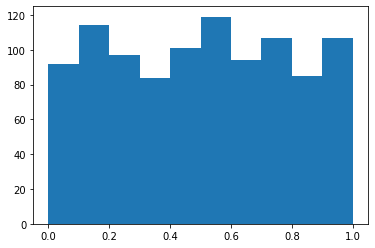

In [75]:
sample = get_uniform_sample()(1, 1000)
plt.hist(sample)

In [150]:
class FFN(nn.Module):
    def __init__(self, layer_sizes, activation):
        super(FFN, self).__init__()
        
        self.layers = [
            nn.Linear(layer_sizes[l-1], layer_sizes[l])
            for l in range(1, len(layer_sizes))
        ]
        self.activation = activation
        
    def forward(self, x):
        out = x
        for l in self.layers:
            out = self.activation(l(out))
        
        return out

In [151]:
ffn = FFN([2, 10, 3], torch.relu)

X = torch.rand(200, 2)
sample = ffn(X)
sample.shape

torch.Size([200, 3])

In [ ]:
class GAN:
    def __init__(self, real_sampler, latent_sampler):
        self.real_sampler = real_sampler
        self.latent_sampler = latent_sampler

    def optimize(self, d_steps):
        for _ in range(d_steps):
            D.zero_grad()
            
            

In [155]:
ffn.parameters()

StopIteration: 

In [174]:
for _ in range(10000000):
    A = T(np.random.uniform(0, 1, (10, 10)))
    B = T(np.random.uniform(0, 1, (10, 10)))
    C = A @ B

In [169]:
A = A.to('cuda')

In [173]:
CUDA_VISIBLE_DEVICES=1,2

In [176]:
torch.cuda.get_device_name()

'GeForce GTX 1080 Ti'

Using data [Only 4 moments]
Epoch 0: D (0.6406760811805725 real_err, 0.7613426446914673 fake_err) G (0.6305822134017944 err); Real Dist ([3.981456092119217, 1.2502202161229012]),  Fake Dist ([-0.24989395877718926, 0.036705397889277826]) 


/home/izpc/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch 100: D (0.5642203688621521 real_err, 0.5479984879493713 fake_err) G (0.8437890410423279 err); Real Dist ([3.9916506723053753, 1.3168685108355171]),  Fake Dist ([3.6536830883026123, 0.01647448521855605]) 
Epoch 200: D (0.6600286364555359 real_err, 0.677490770816803 fake_err) G (0.6773708462715149 err); Real Dist ([3.979413275361061, 1.2496589361584185]),  Fake Dist ([3.342651868581772, 2.1823527641398193]) 
Epoch 300: D (0.38341405987739563 real_err, 0.4387655258178711 fake_err) G (1.040907621383667 err); Real Dist ([3.951328669309616, 1.2689694212879554]),  Fake Dist ([9.900046363830567, 0.16333197607913855]) 
Epoch 400: D (0.6094452738761902 real_err, 0.652277946472168 fake_err) G (0.6215999126434326 err); Real Dist ([4.15486515879631, 1.2359025079097274]),  Fake Dist ([1.5464769701957704, 0.7105636551779366]) 
Epoch 500: D (0.6929054260253906 real_err, 0.691834568977356 fake_err) G (0.6908227801322937 err); Real Dist ([4.066999768011272, 1.2147233977759992]),  Fake Dist ([4.382

Epoch 4100: D (0.6931869983673096 real_err, 0.6934711337089539 fake_err) G (0.6932635307312012 err); Real Dist ([4.084832505941391, 1.2659450229267406]),  Fake Dist ([4.022525529503822, 1.2488025825986733]) 
Epoch 4200: D (0.6930609941482544 real_err, 0.6930607557296753 fake_err) G (0.6932493448257446 err); Real Dist ([4.016212829679251, 1.2058836229898968]),  Fake Dist ([3.988622860312462, 1.2741949196489935]) 
Epoch 4300: D (0.6929895877838135 real_err, 0.6936353445053101 fake_err) G (0.6930086612701416 err); Real Dist ([3.8576554386615753, 1.1988369494303455]),  Fake Dist ([3.9500749497413636, 1.2286646161277839]) 
Epoch 4400: D (0.6948023438453674 real_err, 0.6933062076568604 fake_err) G (0.6930404901504517 err); Real Dist ([4.0267404404878615, 1.2523445823176926]),  Fake Dist ([4.130052884578705, 1.2619298189521204]) 
Epoch 4500: D (0.6932058334350586 real_err, 0.6934993863105774 fake_err) G (0.6928021311759949 err); Real Dist ([3.905005490899086, 1.204734942457082]),  Fake Dist (

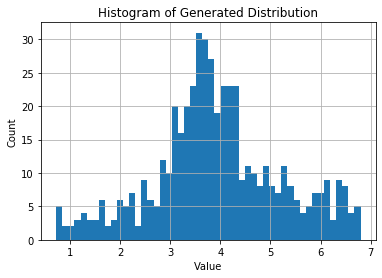

In [177]:
# Generative Adversarial Networks (GAN) example in PyTorch. Tested with PyTorch 0.4.1, Python 3.6.7 (Nov 2018)
# See related blog post at https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f#.sch4xgsa9

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

matplotlib_is_available = True
try:
  from matplotlib import pyplot as plt
except ImportError:
  print("Will skip plotting; matplotlib is not available.")
  matplotlib_is_available = False

# Data params
data_mean = 4
data_stddev = 1.25

# ### Uncomment only one of these to define what data is actually sent to the Discriminator
#(name, preprocess, d_input_func) = ("Raw data", lambda data: data, lambda x: x)
#(name, preprocess, d_input_func) = ("Data and variances", lambda data: decorate_with_diffs(data, 2.0), lambda x: x * 2)
#(name, preprocess, d_input_func) = ("Data and diffs", lambda data: decorate_with_diffs(data, 1.0), lambda x: x * 2)
(name, preprocess, d_input_func) = ("Only 4 moments", lambda data: get_moments(data), lambda x: 4)

print("Using data [%s]" % (name))

# ##### DATA: Target data and generator input data

def get_distribution_sampler(mu, sigma):
    return lambda n: torch.Tensor(np.random.normal(mu, sigma, (1, n)))  # Gaussian

def get_generator_input_sampler():
    return lambda m, n: torch.rand(m, n)  # Uniform-dist data into generator, _NOT_ Gaussian

# ##### MODELS: Generator model and discriminator model

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, f):
        super(Generator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
        self.f = f

    def forward(self, x):
        x = self.map1(x)
        x = self.f(x)
        x = self.map2(x)
        x = self.f(x)
        x = self.map3(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, f):
        super(Discriminator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
        self.f = f

    def forward(self, x):
        x = self.f(self.map1(x))
        x = self.f(self.map2(x))
        return self.f(self.map3(x))

def extract(v):
    return v.data.storage().tolist()

def stats(d):
    return [np.mean(d), np.std(d)]

def get_moments(d):
    # Return the first 4 moments of the data provided
    mean = torch.mean(d)
    diffs = d - mean
    var = torch.mean(torch.pow(diffs, 2.0))
    std = torch.pow(var, 0.5)
    zscores = diffs / std
    skews = torch.mean(torch.pow(zscores, 3.0))
    kurtoses = torch.mean(torch.pow(zscores, 4.0)) - 3.0  # excess kurtosis, should be 0 for Gaussian
    final = torch.cat((mean.reshape(1,), std.reshape(1,), skews.reshape(1,), kurtoses.reshape(1,)))
    return final

def decorate_with_diffs(data, exponent, remove_raw_data=False):
    mean = torch.mean(data.data, 1, keepdim=True)
    mean_broadcast = torch.mul(torch.ones(data.size()), mean.tolist()[0][0])
    diffs = torch.pow(data - Variable(mean_broadcast), exponent)
    if remove_raw_data:
        return torch.cat([diffs], 1)
    else:
        return torch.cat([data, diffs], 1)

def train():
    # Model parameters
    g_input_size = 1      # Random noise dimension coming into generator, per output vector
    g_hidden_size = 5     # Generator complexity
    g_output_size = 1     # Size of generated output vector
    d_input_size = 500    # Minibatch size - cardinality of distributions
    d_hidden_size = 10    # Discriminator complexity
    d_output_size = 1     # Single dimension for 'real' vs. 'fake' classification
    minibatch_size = d_input_size

    d_learning_rate = 1e-3
    g_learning_rate = 1e-3
    sgd_momentum = 0.9

    num_epochs = 5000
    print_interval = 100
    d_steps = 20
    g_steps = 20

    dfe, dre, ge = 0, 0, 0
    d_real_data, d_fake_data, g_fake_data = None, None, None

    discriminator_activation_function = torch.sigmoid
    generator_activation_function = torch.tanh

    d_sampler = get_distribution_sampler(data_mean, data_stddev)
    gi_sampler = get_generator_input_sampler()
    G = Generator(input_size=g_input_size,
                  hidden_size=g_hidden_size,
                  output_size=g_output_size,
                  f=generator_activation_function)
    D = Discriminator(input_size=d_input_func(d_input_size),
                      hidden_size=d_hidden_size,
                      output_size=d_output_size,
                      f=discriminator_activation_function)
    criterion = nn.BCELoss()  # Binary cross entropy: http://pytorch.org/docs/nn.html#bceloss
    d_optimizer = optim.SGD(D.parameters(), lr=d_learning_rate, momentum=sgd_momentum)
    g_optimizer = optim.SGD(G.parameters(), lr=g_learning_rate, momentum=sgd_momentum)

    for epoch in range(num_epochs):
        for d_index in range(d_steps):
            # 1. Train D on real+fake
            D.zero_grad()

            #  1A: Train D on real
            d_real_data = Variable(d_sampler(d_input_size))
            d_real_decision = D(preprocess(d_real_data))
            d_real_error = criterion(d_real_decision, Variable(torch.ones([1,1])))  # ones = true
            d_real_error.backward() # compute/store gradients, but don't change params

            #  1B: Train D on fake
            d_gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
            d_fake_data = G(d_gen_input).detach()  # detach to avoid training G on these labels
            d_fake_decision = D(preprocess(d_fake_data.t()))
            d_fake_error = criterion(d_fake_decision, Variable(torch.zeros([1,1])))  # zeros = fake
            d_fake_error.backward()
            d_optimizer.step()     # Only optimizes D's parameters; changes based on stored gradients from backward()

            dre, dfe = extract(d_real_error)[0], extract(d_fake_error)[0]

        for g_index in range(g_steps):
            # 2. Train G on D's response (but DO NOT train D on these labels)
            G.zero_grad()

            gen_input = Variable(gi_sampler(minibatch_size, g_input_size))
            g_fake_data = G(gen_input)
            dg_fake_decision = D(preprocess(g_fake_data.t()))
            g_error = criterion(dg_fake_decision, Variable(torch.ones([1,1])))  # Train G to pretend it's genuine

            g_error.backward()
            g_optimizer.step()  # Only optimizes G's parameters
            ge = extract(g_error)[0]

        if epoch % print_interval == 0:
            print("Epoch %s: D (%s real_err, %s fake_err) G (%s err); Real Dist (%s),  Fake Dist (%s) " %
                  (epoch, dre, dfe, ge, stats(extract(d_real_data)), stats(extract(d_fake_data))))

    if matplotlib_is_available:
        print("Plotting the generated distribution...")
        values = extract(g_fake_data)
        print(" Values: %s" % (str(values)))
        plt.hist(values, bins=50)
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.title('Histogram of Generated Distribution')
        plt.grid(True)
        plt.show()


train()